In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image

import requests
from PIL import Image
import numpy as np
from io import BytesIO
import os

In [15]:
bp_track = pd.read_csv('data/bp_track.csv')

C:\Users\Shank\AppData\Local\Temp\ipykernel_16388\1573399701.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  bp_track = pd.read_csv('data/bp_track.csv')


In [16]:
bp_track_media = pd.read_csv('data/bp_track_media.csv')

In [17]:
bp_genre = pd.read_csv('data/bp_genre.csv')

In [18]:
bp_genre.head()

,genre_id,genre_name,song_count,genre_url,updated_on
0,8,Hard Dance / Hardcore,178646,/genre/hard-dance-hardcore/8,2023-09-19 15:01:03
1,50,Nu Disco / Disco,157934,/genre/nu-disco-disco/50,2023-09-19 15:01:03
2,12,Deep House,897280,/genre/deep-house/12,2023-09-19 15:01:03
3,85,Bass / Club,20716,/genre/bass-club/85,2023-09-19 15:01:03
4,94,Electro (Classic / Detroit / Modern),19615,/genre/electro-classic-detroit-modern/94,2023-09-19 15:01:03


In [19]:
genre_mapping = {
    # House Group
    'House': 'House',
    'Tech House': 'House',
    'Deep House': 'House',
    'Progressive House': 'House',
    'Funky House': 'House',
    'Jackin House': 'House',
    'Afro House': 'House',
    'Bass House': 'House',

    # Techno Group
    'Techno (Peak Time / Driving)': 'Techno',
    'Techno (Raw / Deep / Hypnotic)': 'Techno',
    'Minimal / Deep Tech': 'Techno',
    'Melodic House & Techno': 'Techno',
    'Hard Techno': 'Techno',

    # Trance Group
    'Trance (Main Floor)': 'Trance',
    'Psy-Trance': 'Trance',
    'Trance (Raw / Deep / Hypnotic)': 'Trance',

    # Bass Music Group
    'Drum & Bass': 'Bass Music',
    'Dubstep': 'Bass Music',
    '140 / Deep Dubstep / Grime': 'Bass Music',
    'Trap / Wave': 'Bass Music',
    'Breaks / Breakbeat / UK Bass': 'Bass Music',
    'Bass / Club': 'Bass Music',
    'UK Garage / Bassline': 'Bass Music',

    # Hard Dance & Hardcore Group
    'Hard Dance / Hardcore': 'Hard Dance & Hardcore',

    # Dance/Pop Group
    'Mainstage': 'Dance/Pop',
    'Dance / Electro Pop': 'Dance/Pop',
    'Nu Disco / Disco': 'Dance/Pop',

    # Downtempo & World Group
    'Organic House / Downtempo': 'Downtempo & World',
    'Amapiano': 'Downtempo & World',

    # Experimental & Indie Group
    'Electronica': 'Experimental & Indie',
    'Indie Dance': 'Experimental & Indie',
    'Electro (Classic / Detroit / Modern)': 'Experimental & Indie'
}


In [20]:
# Assuming your DataFrame is df and it has a column 'genre_name'
bp_genre['broad_genre'] = bp_genre['genre_name'].map(genre_mapping)

# Check the result
print(bp_genre[['genre_name', 'broad_genre']])

                              genre_name            broad_genre
0                  Hard Dance / Hardcore  Hard Dance & Hardcore
1                       Nu Disco / Disco              Dance/Pop
2                             Deep House                  House
3                            Bass / Club             Bass Music
4   Electro (Classic / Detroit / Modern)   Experimental & Indie
5                            Hard Techno                 Techno
6                                Dubstep             Bass Music
7             140 / Deep Dubstep / Grime             Bass Music
8                            Funky House                  House
9                      Progressive House                  House
10             Organic House / Downtempo      Downtempo & World
11                           Indie Dance   Experimental & Indie
12                            Afro House                  House
13                   Minimal / Deep Tech                 Techno
14                             Mainstage

In [21]:
# Perform the merge to add only 'genre_id' from bp_track to bp_track_media
bp_media = pd.merge(bp_track_media, bp_track[['track_id', 'genre_id']], on='track_id', how='inner')

# Display the first few rows to verify
bp_media.head()

,track_id,wave_img_id,wave_img_uuid,sample_uuid,sample_start,sample_end,updated_on,genre_id
0,17767172,34401296.0,09d00050-0a43-42f1-bb6e-c22bf9591a80,09d00050-0a43-42f1-bb6e-c22bf9591a80,172732.0,292732.0,2023-09-14 16:19:56,99
1,17775434,34430784.0,b9509b0f-2b7d-4254-84df-cc53eded7904,b9509b0f-2b7d-4254-84df-cc53eded7904,163532.0,283532.0,2023-09-14 16:19:56,99
2,17800962,34520332.0,a9519a6a-a7cf-4a9e-aa55-b1b0ea80870b,a9519a6a-a7cf-4a9e-aa55-b1b0ea80870b,157108.0,277108.0,2023-09-14 16:19:56,99
3,17610335,33799612.0,93747c55-cfb1-4df5-9c6a-ce9f5751983f,93747c55-cfb1-4df5-9c6a-ce9f5751983f,162976.0,282976.0,2023-09-14 16:19:56,99
4,17610338,33799613.0,e104a0f7-dfb7-4e10-8ed3-056e018c9775,e104a0f7-dfb7-4e10-8ed3-056e018c9775,174826.0,294826.0,2023-09-14 16:19:56,99


In [22]:
# Assuming bp_media contains the genre_id and you want to replace it with genre_name

# Merge bp_media with bp_genre on 'genre_id'
bp_media = pd.merge(bp_media, bp_genre[['genre_id', 'broad_genre']], on='genre_id', how='left')

# Optionally, drop 'genre_id' if you no longer need it
bp_media.drop('genre_id', axis=1, inplace=True)

In [23]:
# Assuming bp_media contains the genre_id and you want to replace it with genre_name

# Merge bp_media with bp_genre on 'genre_id'
bp_track = pd.merge(bp_track, bp_genre[['genre_id', 'broad_genre']], on='genre_id', how='left')

# Optionally, drop 'genre_id' if you no longer need it
bp_track.drop('genre_id', axis=1, inplace=True)

In [24]:
bp_track.drop(columns=['track_id', 'title', 'mix', 'is_remixed', 'release_date', 'track_url', 'duration', 'isrc', 'updated_on', 'is_matched_spot', 'subgenre_id'], inplace=True, axis=1)

In [25]:
bp_track.isnull().sum()

bpm               0
duration_ms    2632
key_id         6254
label_id          0
release_id        0
broad_genre       0
dtype: int64

In [26]:
bp_track = bp_track.dropna()

In [27]:
# Define your desired sample size for each class
sample_size = 5000  # Adjust this to your desired sample size

# Get the minimum count of samples available across all genres
min_count = bp_track['broad_genre'].value_counts().min()

# Ensure the sample size does not exceed the minimum class size
sample_size_per_class = min(sample_size, min_count)

# Sample from each genre
bp_sample = bp_track.groupby('broad_genre').apply(lambda x: x.sample(sample_size_per_class)).reset_index(drop=True)

# Display the balanced sample
bp_sample.head()

C:\Users\Shank\AppData\Local\Temp\ipykernel_16388\220104363.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bp_sample = bp_track.groupby('broad_genre').apply(lambda x: x.sample(sample_size_per_class)).reset_index(drop=True)


,bpm,duration_ms,key_id,label_id,release_id,broad_genre
0,134,209389.0,4.0,43385,1859722,Bass Music
1,148,333855.0,12.0,45059,4125075,Bass Music
2,91,265866.0,6.0,11831,136860,Bass Music
3,90,257333.0,9.0,23097,1556712,Bass Music
4,91,121521.0,3.0,51198,2203810,Bass Music


In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the broad_genre column
bp_sample['broad_genre_encoded'] = le.fit_transform(bp_sample['broad_genre'])

# Check the result
bp_sample.head()

,bpm,duration_ms,key_id,label_id,release_id,broad_genre,broad_genre_encoded
0,134,209389.0,4.0,43385,1859722,Bass Music,0
1,148,333855.0,12.0,45059,4125075,Bass Music,0
2,91,265866.0,6.0,11831,136860,Bass Music,0
3,90,257333.0,9.0,23097,1556712,Bass Music,0
4,91,121521.0,3.0,51198,2203810,Bass Music,0


In [29]:
features = bp_sample.drop(columns=['broad_genre', 'broad_genre_encoded'])

In [30]:
X = features
y = bp_sample['broad_genre_encoded']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
def train_and_evaluate_model(models):
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1 Score': f1_score,
        'ROC AUC': roc_auc_score
    }

    results = {}

    for model in models:
        model_scores = {}
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute each metric
        for metric_name, metric_function in metrics.items():
            if metric_name == 'ROC AUC':
                # For binary or multiclass classification, use the predict_proba method
                if hasattr(model, "predict_proba"):
                    y_pred_prob = model.predict_proba(X_test)
                    if y_pred_prob.shape[1] == 2:
                        # Binary classification case
                        score = metric_function(y_test, y_pred_prob[:, 1])
                    else:
                        # Multiclass case
                        score = metric_function(y_test, y_pred_prob, multi_class='ovr')
                else:
                    score = "N/A"  # In case model does not support predict_proba
            else:
                # For multiclass classification, use 'weighted' average
                if metric_name in ['Precision', 'Recall', 'F1 Score']:
                    score = metric_function(y_test, y_pred, average='weighted')
                else:
                    score = metric_function(y_test, y_pred)

            model_scores[metric_name] = score

        results[str(model)] = model_scores

    return results


In [33]:
models = [
    LogisticRegression(),               # Linear model
    RandomForestClassifier(),           # Ensemble of decision trees
    GradientBoostingClassifier(),       # Boosting method
    AdaBoostClassifier(),               # Boosting method
    BaggingClassifier(),                # Bagging method
    KNeighborsClassifier(),             # k-NN classifier
    DecisionTreeClassifier(),           # Simple decision tree
    ExtraTreesClassifier()
    ]
model_metrics = train_and_evaluate_model(models=models)

c:\Users\Shank\anaconda3\envs\dsenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shank\anaconda3\envs\dsenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shank\anaconda3\envs\dsenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the defaul

C:\Users\Shank\AppData\Local\Temp\ipykernel_16388\391156369.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_metrics.keys()), y=metric_results[metric], palette="Blues_r", ax=ax)
C:\Users\Shank\AppData\Local\Temp\ipykernel_16388\391156369.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels())
C:\Users\Shank\AppData\Local\Temp\ipykernel_16388\391156369.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_metrics.keys()), y=metric_results[metric], palette="Blues_r", ax=ax)
C:\Users\Shank\AppData\Local\Temp\ipykernel_16388\391156369.py:26: Use

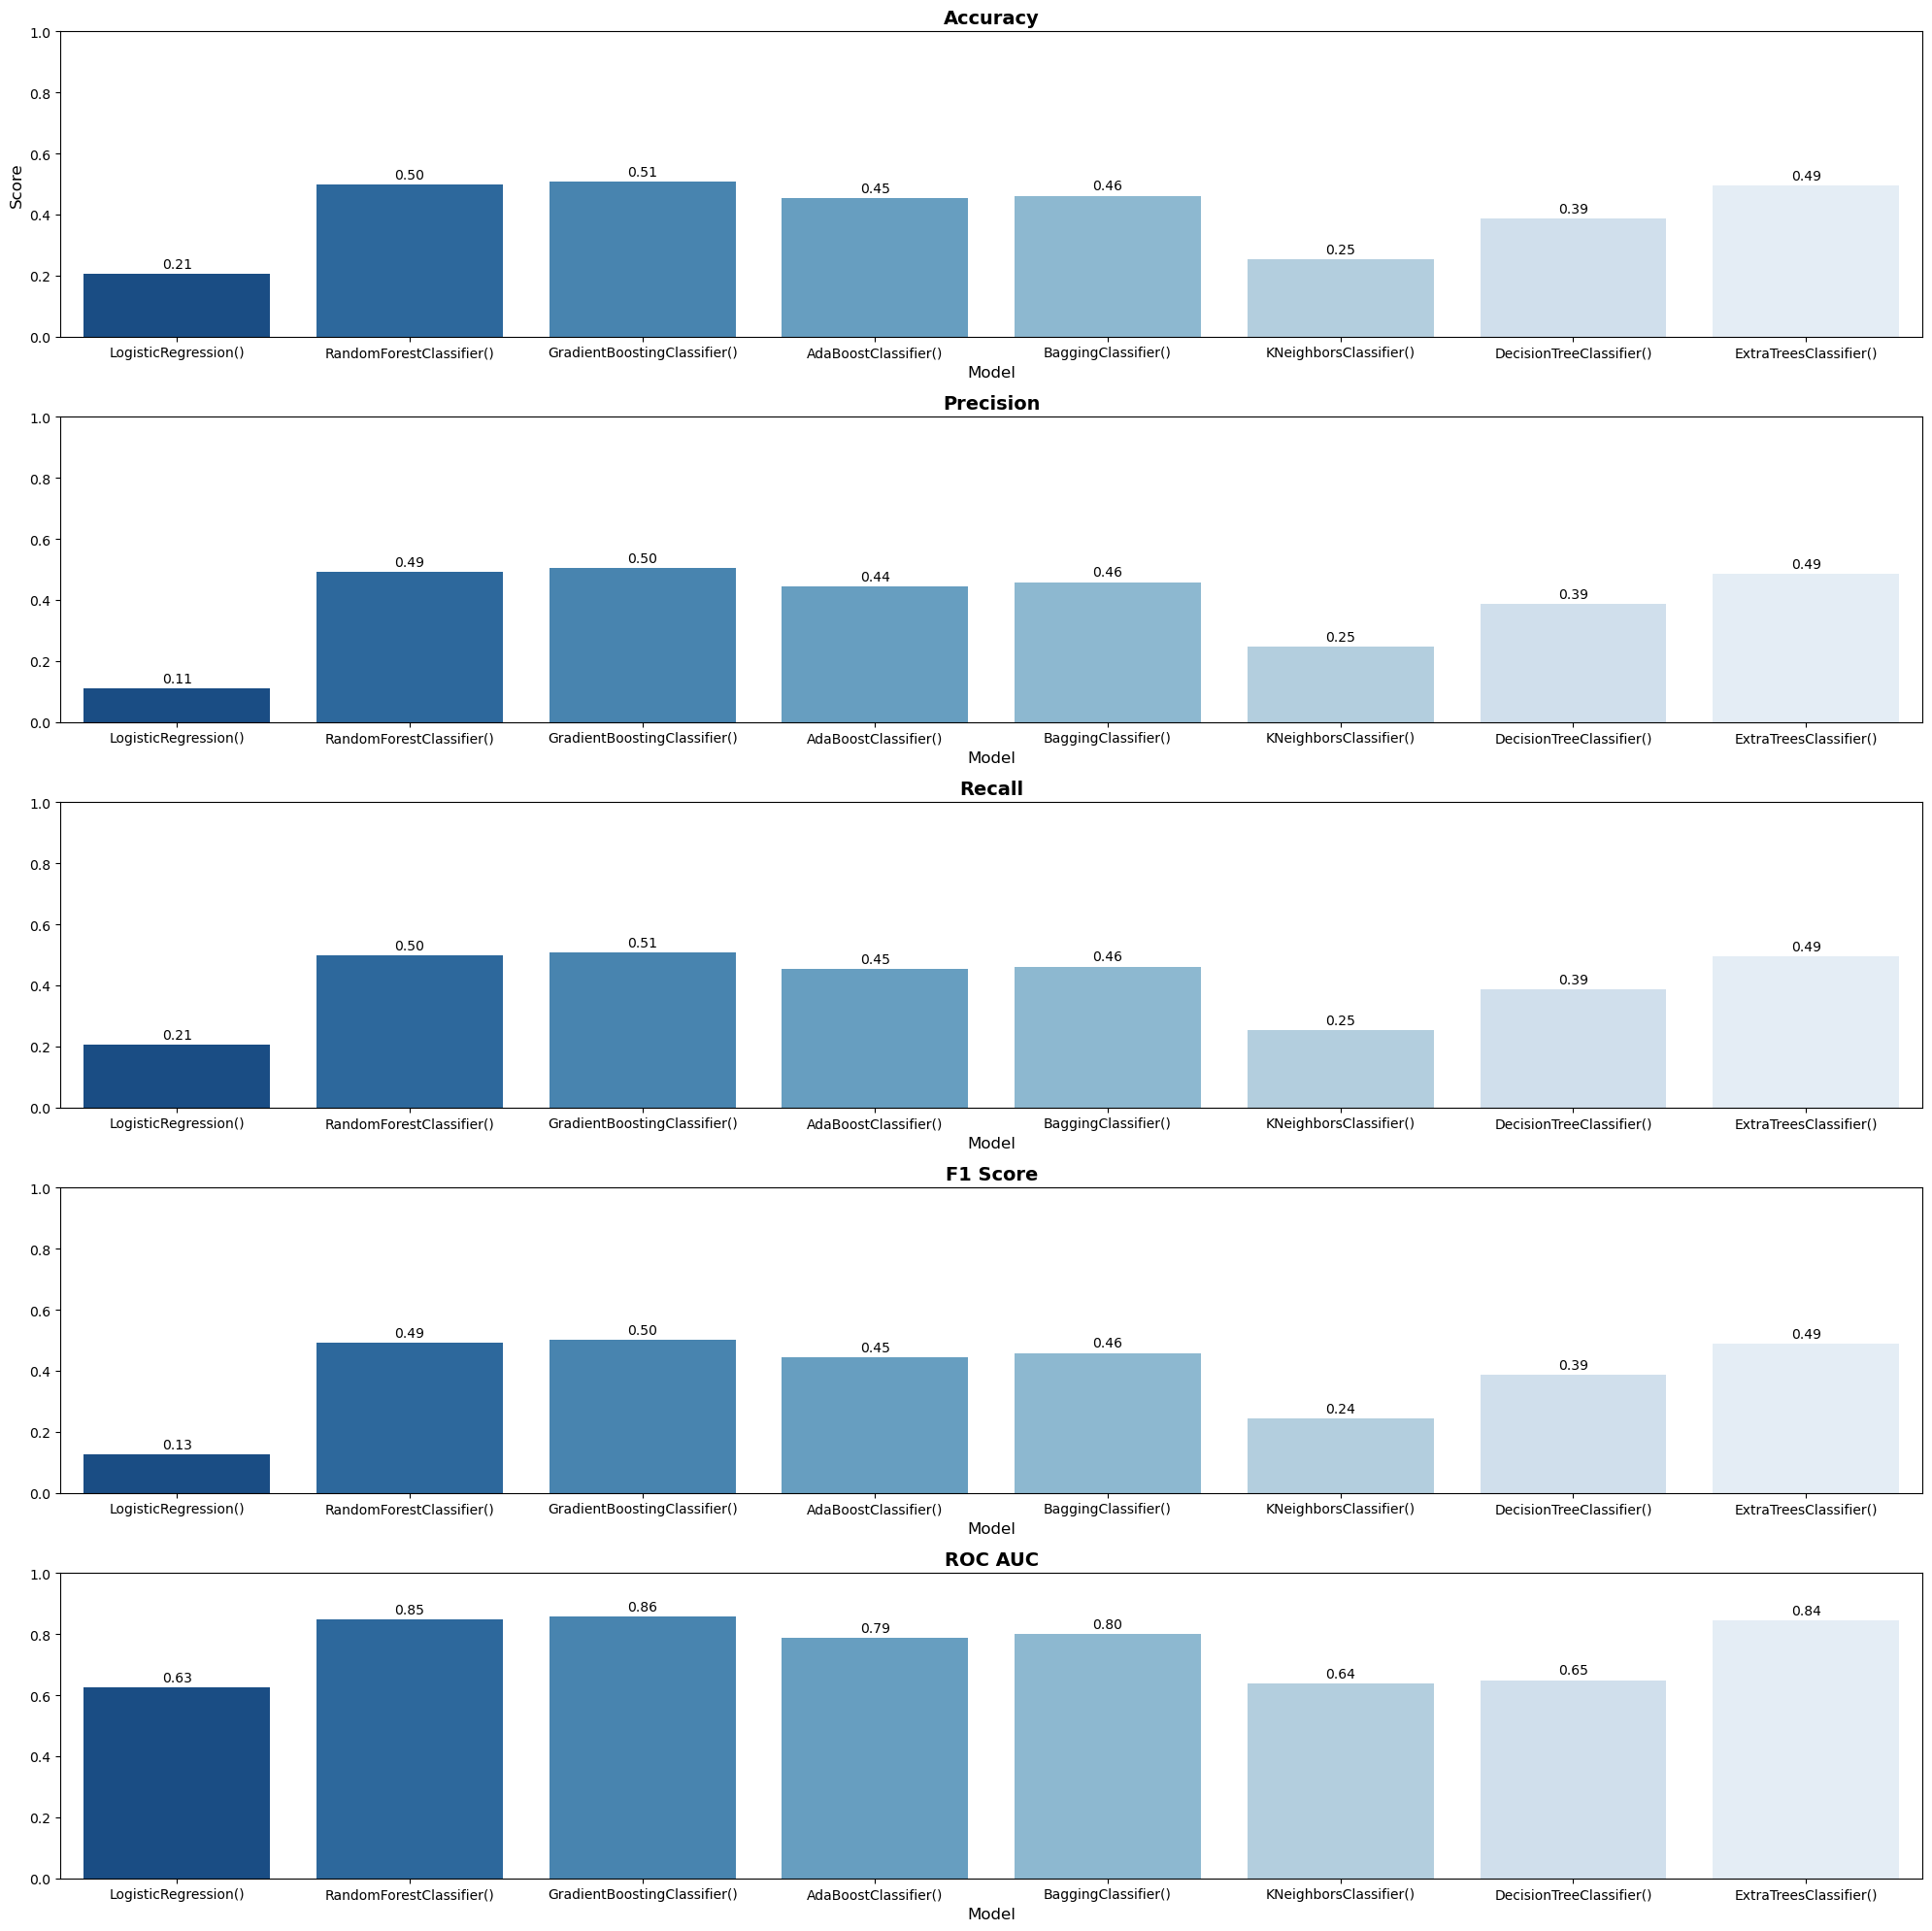

In [34]:
# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
metric_results = {metric: [] for metric in metrics}

# Collect data for each metric
for model, scores in model_metrics.items():
    for metric in metrics:
        metric_results[metric].append(scores.get(metric, 0))

# Create subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(20, 20), sharey=True)

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(x=list(model_metrics.keys()), y=metric_results[metric], palette="Blues_r", ax=ax)

    # Add labels to the bars
    for j, value in enumerate(metric_results[metric]):
        ax.text(j, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

    # Set labels and title
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylim([0,1])
    ax.set_title(metric, fontsize=14, weight='bold')
    ax.set_xticklabels(ax.get_xticklabels())

# Set common ylabel
axes[0].set_ylabel('Score', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
# plt.savefig('savefig/ClassificationModels.png')
plt.show()


In [35]:
bp_media.isnull().sum()


track_id             0
wave_img_id      15834
wave_img_uuid    15834
sample_uuid          0
sample_start      2872
sample_end        2872
updated_on           0
broad_genre          0
dtype: int64

In [36]:
bp_media.dropna(inplace=True)

In [37]:
bp_media.head()

,track_id,wave_img_id,wave_img_uuid,sample_uuid,sample_start,sample_end,updated_on,broad_genre
0,17767172,34401296.0,09d00050-0a43-42f1-bb6e-c22bf9591a80,09d00050-0a43-42f1-bb6e-c22bf9591a80,172732.0,292732.0,2023-09-14 16:19:56,Trance
1,17775434,34430784.0,b9509b0f-2b7d-4254-84df-cc53eded7904,b9509b0f-2b7d-4254-84df-cc53eded7904,163532.0,283532.0,2023-09-14 16:19:56,Trance
2,17800962,34520332.0,a9519a6a-a7cf-4a9e-aa55-b1b0ea80870b,a9519a6a-a7cf-4a9e-aa55-b1b0ea80870b,157108.0,277108.0,2023-09-14 16:19:56,Trance
3,17610335,33799612.0,93747c55-cfb1-4df5-9c6a-ce9f5751983f,93747c55-cfb1-4df5-9c6a-ce9f5751983f,162976.0,282976.0,2023-09-14 16:19:56,Trance
4,17610338,33799613.0,e104a0f7-dfb7-4e10-8ed3-056e018c9775,e104a0f7-dfb7-4e10-8ed3-056e018c9775,174826.0,294826.0,2023-09-14 16:19:56,Trance


In [39]:
len(bp_media['broad_genre'].unique())

8

In [40]:
sampled_data = bp_media.sample(n=5000, random_state=42)

In [41]:
# Function to download and process images from URLs, and collect error IDs
def load_images_from_url(df, img_column, target_size=(360, 60)):
    images = []
    failed_images = []  # List to store IDs of failed image downloads
    base_url = "https://geo-media.beatport.com/image_size/1500x250/"  # Replace with actual base URL if needed
    
    for img_id in df[img_column]:
        # Construct full image URL
        img_url = f"{base_url}{img_id}.png"
        try:
            # Send a request to download the image
            response = requests.get(img_url)
            response.raise_for_status()  # Raise an exception for failed requests

            # Open the image from the response content
            img = Image.open(BytesIO(response.content)).convert('RGB')  # Convert to RGB
            img = img.resize(target_size)  # Resize to the target size
            img_array = np.array(img)
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {img_id}: {e}")
            failed_images.append(img_id)  # Add the image ID to the failed list
    
    return np.array(images), failed_images

# Load images from URLs using the wave_img_uuid or wave_img_id
image_data, failed_image_ids = load_images_from_url(sampled_data, 'wave_img_uuid')

# Check which images failed to load
if failed_image_ids:
    print(f"The following images failed to load: {failed_image_ids}")
else:
    print("All images loaded successfully.")


Error loading image f982da5d-dbee-46f5-839c-bcb0ec6e4be4: 404 Client Error: Not Found for url: https://geo-media.beatport.com/image_size/1500x250/f982da5d-dbee-46f5-839c-bcb0ec6e4be4.png
Error loading image 17a1fd27-a3e8-4900-b9f5-22509a097451: 404 Client Error: Not Found for url: https://geo-media.beatport.com/image_size/1500x250/17a1fd27-a3e8-4900-b9f5-22509a097451.png
Error loading image b7dab5ad-3d3e-4d56-82cd-dd3e46ff8508: 404 Client Error: Not Found for url: https://geo-media.beatport.com/image_size/1500x250/b7dab5ad-3d3e-4d56-82cd-dd3e46ff8508.png
Error loading image eca24c26-7311-477a-8f1f-02f2b7ee9d6e: 404 Client Error: Not Found for url: https://geo-media.beatport.com/image_size/1500x250/eca24c26-7311-477a-8f1f-02f2b7ee9d6e.png
Error loading image bbabbb81-42d8-4881-a7ff-c75a74214fb0: 404 Client Error: Not Found for url: https://geo-media.beatport.com/image_size/1500x250/bbabbb81-42d8-4881-a7ff-c75a74214fb0.png
Error loading image 16fe20f8-7a5f-41ab-9976-0611dface0ab: 404 Cli

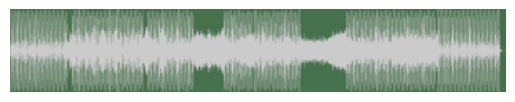

In [42]:
# Get the image at the specified index
img = image_data[36]

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [43]:
# Normalize the image data
image_data = image_data / 255.0

In [44]:
# Check how many unique genres you have in the dataset
print(sampled_data['broad_genre'].nunique())

# Check the distribution of genre IDs
print(sampled_data['broad_genre'].value_counts())

8
broad_genre
House                    1816
Techno                    909
Experimental & Indie      735
Bass Music                559
Dance/Pop                 540
Trance                    299
Hard Dance & Hardcore      89
Downtempo & World          53
Name: count, dtype: int64


In [45]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming the merged_data contains 'genre_name' instead of 'genre_id'
# Step 1: Label encode the genre names to convert them to numeric form
label_encoder = LabelEncoder()
genre_labels_encoded = label_encoder.fit_transform(sampled_data['broad_genre'][:len(image_data)])

# Step 2: One-hot encode the numeric genre labels
num_classes = len(label_encoder.classes_)  # Get the number of unique genres
target_labels = to_categorical(genre_labels_encoded, num_classes=num_classes)



In [46]:
print(f"Number of images: {len(image_data)}")
print(f"Number of labels: {len(target_labels)}")

Number of images: 4956
Number of labels: 4956


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data, target_labels, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Training labels shape (y_train): {y_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Testing labels shape (y_test): {y_test.shape}")


Training set shape (X_train): (3964, 60, 360, 3)
Training labels shape (y_train): (3964, 8)
Testing set shape (X_test): (992, 60, 360, 3)
Testing labels shape (y_test): (992, 8)


In [48]:
# Build a CNN model (same as before)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [52]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(60, 360, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data for Dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer (softmax for multi-class classification)
model.add(Dense(len(sampled_data['broad_genre'].unique()), activation='softmax'))

In [55]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model_image.h5', monitor='val_accuracy', save_best_only=True)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=15, callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/100
212/212 [==============================] - 14s 63ms/step - loss: 1.7460 - accuracy: 0.3611 - val_loss: 1.7386 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 2/100
212/212 [==============================] - 13s 61ms/step - loss: 1.7432 - accuracy: 0.3611 - val_loss: 1.7368 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 3/100
212/212 [==============================] - 13s 59ms/step - loss: 1.7443 - accuracy: 0.3611 - val_loss: 1.7335 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 4/100
212/212 [==============================] - 12s 57ms/step - loss: 1.7425 - accuracy: 0.3611 - val_loss: 1.7334 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 5/100
212/212 [==============================] - 12s 58ms/step - loss: 1.7377 - accuracy: 0.3611 - val_loss: 1.7334 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 6/100
212/212 [==============================] - 13s 61ms/step - loss: 1.7439 - accuracy: 0.3611 - val_loss: 1.7361 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 7/100
212/212 [==============================]

In [56]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

31/31 [==============================] - 1s 44ms/step - loss: 1.7386 - accuracy: 0.3639
Test Accuracy: 0.36391130089759827


In [57]:
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd



In [58]:
import requests
import numpy as np
import librosa
from tqdm import tqdm  # For progress bars
import os

# Function to download and process audio from URLs, and collect error IDs
def load_audio_from_url(df, sample_uuid_column, n_mfcc=13, max_length=200):
    audio_features = []
    failed_samples = []  # List to store IDs of failed audio downloads
    base_url = "https://geo-samples.beatport.com/track/"  # Base URL for audio files
    save_directory = "audio_files"  # Directory to save downloaded audio
    os.makedirs(save_directory, exist_ok=True)

    for sample_uuid in tqdm(df[sample_uuid_column]):
        # Construct full audio URL
        audio_url = f"{base_url}{sample_uuid}.LOFI.mp3"
        save_path = os.path.join(save_directory, f"{sample_uuid}.mp3")

        try:
            # Send a request to download the audio file
            response = requests.get(audio_url)
            response.raise_for_status()  # Raise an exception for failed requests

            # Save the downloaded audio file locally
            with open(save_path, 'wb') as f:
                f.write(response.content)

            # Load the audio file using librosa
            signal, sample_rate = librosa.load(save_path, sr=None)

            # Extract MFCC features
            mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc)

            # Pad or truncate MFCCs to max_length
            if mfccs.shape[1] < max_length:
                mfccs_padded = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
            else:
                mfccs_padded = mfccs[:, :max_length]

            # Append the processed features
            audio_features.append(mfccs_padded)

        except Exception as e:
            print(f"Error loading audio {sample_uuid}: {e}")
            failed_samples.append(sample_uuid)  # Add the sample_uuid to the failed list

    return np.array(audio_features), failed_samples

# Example: Use the function to load audio from URLs
# 'sampled_data' is your DataFrame and 'sample_uuid' is the column with UUIDs
audio_data, failed_sample_uuids = load_audio_from_url(sampled_data, 'sample_uuid')

# Check which audio samples failed to load
if failed_sample_uuids:
    print(f"The following audio samples failed to load: {failed_sample_uuids}")
else:
    print("All audio files loaded and processed successfully.")


  3%|▎         | 161/5000 [02:12<58:08,  1.39it/s]  

Error loading audio e4d88b22-0774-424c-95bb-7b71c4296fdb: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/e4d88b22-0774-424c-95bb-7b71c4296fdb.LOFI.mp3


  4%|▍         | 215/5000 [02:45<48:25,  1.65it/s]  

Error loading audio 7baebdf4-5451-4dc1-9f22-3d8babdc2e9d: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/7baebdf4-5451-4dc1-9f22-3d8babdc2e9d.LOFI.mp3


 12%|█▏        | 609/5000 [07:12<51:22,  1.42it/s]  

Error loading audio 035d8f2d-66af-4595-8554-4fa517f07bde: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/035d8f2d-66af-4595-8554-4fa517f07bde.LOFI.mp3


 24%|██▍       | 1197/5000 [14:46<49:34,  1.28it/s]  

Error loading audio 8353d0bb-a732-4538-a2f8-b26d35bf83fd: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/8353d0bb-a732-4538-a2f8-b26d35bf83fd.LOFI.mp3


 26%|██▌       | 1297/5000 [16:08<51:30,  1.20it/s]  

Error loading audio 676057c7-a6eb-401e-be68-36c6e9512732: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/676057c7-a6eb-401e-be68-36c6e9512732.LOFI.mp3


 29%|██▊       | 1437/5000 [18:03<42:07,  1.41it/s]  

Error loading audio cedb421d-91ff-4b9f-be74-5a6ba7b7b71f: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/cedb421d-91ff-4b9f-be74-5a6ba7b7b71f.LOFI.mp3


 33%|███▎      | 1640/5000 [20:52<43:37,  1.28it/s]  

Error loading audio 290a5714-5537-4651-9892-23bb213d09a5: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/290a5714-5537-4651-9892-23bb213d09a5.LOFI.mp3


 34%|███▎      | 1687/5000 [21:34<48:24,  1.14it/s]  

Error loading audio 109f3270-27a4-4d7e-b532-5c8391bba0d0: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/109f3270-27a4-4d7e-b532-5c8391bba0d0.LOFI.mp3


 35%|███▍      | 1728/5000 [22:12<42:54,  1.27it/s]  

Error loading audio f4aa6f5c-72ea-46ed-99ce-b236f72aa3e6: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/f4aa6f5c-72ea-46ed-99ce-b236f72aa3e6.LOFI.mp3


 36%|███▋      | 1822/5000 [23:34<53:22,  1.01s/it]  

Error loading audio 5829d0d1-1aac-4fb0-a578-313bd87c515f: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/5829d0d1-1aac-4fb0-a578-313bd87c515f.LOFI.mp3


 37%|███▋      | 1844/5000 [23:54<58:57,  1.12s/it]  

Error loading audio 5ba73ac4-0abe-4747-aaf2-59605beec2e1: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/5ba73ac4-0abe-4747-aaf2-59605beec2e1.LOFI.mp3


 40%|████      | 2019/5000 [26:48<36:33,  1.36it/s]  

Error loading audio 3e9a86e4-58fa-444e-a94c-a3a757b3b95c: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/3e9a86e4-58fa-444e-a94c-a3a757b3b95c.LOFI.mp3


 52%|█████▏    | 2621/5000 [38:17<33:29,  1.18it/s]  

Error loading audio a33e2bb0-0002-4707-8699-120538edc947: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/a33e2bb0-0002-4707-8699-120538edc947.LOFI.mp3


 59%|█████▉    | 2973/5000 [43:19<27:33,  1.23it/s]

Error loading audio 434075c9-9c94-4955-a17f-4dbe22dac50e: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/434075c9-9c94-4955-a17f-4dbe22dac50e.LOFI.mp3


 60%|██████    | 3008/5000 [43:49<28:07,  1.18it/s]

Error loading audio a8efe233-856f-42eb-a308-aa3372e96980: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/a8efe233-856f-42eb-a308-aa3372e96980.LOFI.mp3


 61%|██████    | 3042/5000 [44:19<20:15,  1.61it/s]

Error loading audio 7983dc30-42c1-47f9-afe8-72dab3b1b12e: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/7983dc30-42c1-47f9-afe8-72dab3b1b12e.LOFI.mp3


 64%|██████▎   | 3180/5000 [46:23<23:12,  1.31it/s]

Error loading audio 17afa197-2283-4d03-8b63-af21d98f48f8: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/17afa197-2283-4d03-8b63-af21d98f48f8.LOFI.mp3


 65%|██████▍   | 3237/5000 [47:13<25:51,  1.14it/s]

Error loading audio 20c273de-2253-466b-91ab-3ac341a4d14d: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/20c273de-2253-466b-91ab-3ac341a4d14d.LOFI.mp3


 65%|██████▍   | 3242/5000 [47:17<23:42,  1.24it/s]

Error loading audio 5becdf4f-a320-46bf-8680-362b48d12352: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/5becdf4f-a320-46bf-8680-362b48d12352.LOFI.mp3


 66%|██████▌   | 3297/5000 [48:05<21:09,  1.34it/s]

Error loading audio 09fd7071-a7ae-43a4-98f6-9c172ff9dc70: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/09fd7071-a7ae-43a4-98f6-9c172ff9dc70.LOFI.mp3


 71%|███████   | 3533/5000 [51:35<15:05,  1.62it/s]

Error loading audio 0723ff3d-b596-419b-9374-64e74f0d4b0a: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/0723ff3d-b596-419b-9374-64e74f0d4b0a.LOFI.mp3


 72%|███████▏  | 3624/5000 [52:52<18:41,  1.23it/s]

Error loading audio bf66dc25-f765-41f7-8a06-62cc32e47f0a: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/bf66dc25-f765-41f7-8a06-62cc32e47f0a.LOFI.mp3


 85%|████████▍ | 4226/5000 [1:02:13<08:40,  1.49it/s]

Error loading audio ffbb9328-b35a-491f-a3c8-94f4ca3c02a5: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/ffbb9328-b35a-491f-a3c8-94f4ca3c02a5.LOFI.mp3


 86%|████████▌ | 4276/5000 [1:03:00<12:45,  1.06s/it]

Error loading audio bfde940b-f351-4f92-800b-47a5f4da6ae4: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/bfde940b-f351-4f92-800b-47a5f4da6ae4.LOFI.mp3


 88%|████████▊ | 4414/5000 [1:05:01<07:59,  1.22it/s]

Error loading audio 9001a35b-ff77-486a-a087-65e0ad6bffd3: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/9001a35b-ff77-486a-a087-65e0ad6bffd3.LOFI.mp3


 89%|████████▉ | 4448/5000 [1:05:30<08:14,  1.12it/s]

Error loading audio e4511139-3023-4339-b462-00f581b051a6: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/e4511139-3023-4339-b462-00f581b051a6.LOFI.mp3


 90%|████████▉ | 4498/5000 [1:06:16<07:43,  1.08it/s]

Error loading audio e5f1a451-f612-49dd-8de4-64d132de643d: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/e5f1a451-f612-49dd-8de4-64d132de643d.LOFI.mp3


 90%|█████████ | 4517/5000 [1:06:34<07:54,  1.02it/s]

Error loading audio d379f90e-1b35-47f2-97c1-569106eaa463: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/d379f90e-1b35-47f2-97c1-569106eaa463.LOFI.mp3


 90%|█████████ | 4520/5000 [1:06:36<06:17,  1.27it/s]

Error loading audio 3da35553-3d0c-4d9a-a93f-183d458a98f2: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/3da35553-3d0c-4d9a-a93f-183d458a98f2.LOFI.mp3


 91%|█████████ | 4552/5000 [1:07:04<06:22,  1.17it/s]

Error loading audio 069e37b0-e55c-495d-b933-b86ec9a2dfdc: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/069e37b0-e55c-495d-b933-b86ec9a2dfdc.LOFI.mp3


 92%|█████████▏| 4592/5000 [1:07:39<05:53,  1.15it/s]

Error loading audio 81e84100-0b7f-472b-a846-472e817c1a09: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/81e84100-0b7f-472b-a846-472e817c1a09.LOFI.mp3


 98%|█████████▊| 4884/5000 [1:12:14<01:45,  1.10it/s]

Error loading audio deb33112-3a2b-4b9c-97e9-45a3362ad7a0: 404 Client Error: Not Found for url: https://geo-samples.beatport.com/track/deb33112-3a2b-4b9c-97e9-45a3362ad7a0.LOFI.mp3


100%|██████████| 5000/5000 [1:14:04<00:00,  1.13it/s]


The following audio samples failed to load: ['e4d88b22-0774-424c-95bb-7b71c4296fdb', '7baebdf4-5451-4dc1-9f22-3d8babdc2e9d', '035d8f2d-66af-4595-8554-4fa517f07bde', '8353d0bb-a732-4538-a2f8-b26d35bf83fd', '676057c7-a6eb-401e-be68-36c6e9512732', 'cedb421d-91ff-4b9f-be74-5a6ba7b7b71f', '290a5714-5537-4651-9892-23bb213d09a5', '109f3270-27a4-4d7e-b532-5c8391bba0d0', 'f4aa6f5c-72ea-46ed-99ce-b236f72aa3e6', '5829d0d1-1aac-4fb0-a578-313bd87c515f', '5ba73ac4-0abe-4747-aaf2-59605beec2e1', '3e9a86e4-58fa-444e-a94c-a3a757b3b95c', 'a33e2bb0-0002-4707-8699-120538edc947', '434075c9-9c94-4955-a17f-4dbe22dac50e', 'a8efe233-856f-42eb-a308-aa3372e96980', '7983dc30-42c1-47f9-afe8-72dab3b1b12e', '17afa197-2283-4d03-8b63-af21d98f48f8', '20c273de-2253-466b-91ab-3ac341a4d14d', '5becdf4f-a320-46bf-8680-362b48d12352', '09fd7071-a7ae-43a4-98f6-9c172ff9dc70', '0723ff3d-b596-419b-9374-64e74f0d4b0a', 'bf66dc25-f765-41f7-8a06-62cc32e47f0a', 'ffbb9328-b35a-491f-a3c8-94f4ca3c02a5', 'bfde940b-f351-4f92-800b-47a5f4da6a

In [59]:
from IPython.display import Audio

# Specify the path to the downloaded audio file
sample_uuid = sampled_data['sample_uuid'].iloc[36]
audio_file_path = f'audio_files/{sample_uuid}.mp3'

# Play the audio in the notebook
Audio(audio_file_path)


In [60]:
import os
import librosa
import numpy as np

# Function to extract MFCCs from an audio file
def extract_mfcc(audio_file_path, n_mfcc=13, max_length=200):
    try:
        # Load the audio file using librosa
        signal, sample_rate = librosa.load(audio_file_path, sr=None)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc)

        # Pad or truncate MFCCs to a fixed length (so all inputs have the same shape)
        if mfccs.shape[1] < max_length:
            mfccs_padded = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
        else:
            mfccs_padded = mfccs[:, :max_length]

        return mfccs_padded
    except Exception as e:
        print(f"Error processing audio file {audio_file_path}: {e}")
        return None


In [61]:
sample_uuid = sampled_data['sample_uuid'].iloc[36]
audio_file_path = f'audio_files/{sample_uuid}.mp3'

extract_mfcc(audio_file_path=audio_file_path)

array([[-187.74382   , -149.46121   , -113.71291   , ..., -164.07423   ,
        -178.19682   , -183.26138   ],
       [ 173.22792   ,  190.73845   ,  173.51865   , ...,  170.1913    ,
         178.07458   ,  187.79745   ],
       [ -23.288624  ,  -29.57731   ,  -28.98238   , ...,    1.6493759 ,
          -5.9126043 ,   -2.3311372 ],
       ...,
       [  -5.501027  ,   -1.1983452 ,   -3.624613  , ...,   11.540522  ,
          12.948902  ,    7.3343863 ],
       [   1.6292583 ,   -2.2722106 ,   -0.23138475, ...,   18.715858  ,
          12.050005  ,    5.6348743 ],
       [   8.539353  ,    1.9637096 ,   -0.58613074, ...,   16.06186   ,
           7.897702  ,    5.850874  ]], dtype=float32)

In [62]:
from tqdm import tqdm  # For progress bars
import os

# Directory where your audio files are stored
audio_directory = 'audio_files'  # Replace with your actual directory path

# Initialize lists to hold MFCC features and genres
mfcc_features = []
genres = []

# Iterate over all audio files in the directory and extract MFCCs
for file_name in tqdm(os.listdir(audio_directory)):
    # Extract the sample_uuid from the file name (assuming the file name is in the form 'sample_uuid.mp3')
    sample_uuid = file_name.replace('.mp3', '')  # Remove the file extension to get the sample_uuid
    
    # Find the corresponding genre in the DataFrame
    genre = sampled_data.loc[sampled_data['sample_uuid'] == sample_uuid, 'broad_genre'].values
    if len(genre) == 0:
        print(f"Genre not found for {sample_uuid}, skipping.")
        continue
    genre = genre[0]  # Extract the genre value

    # Construct the full path to the audio file
    audio_file_path = os.path.join(audio_directory, file_name)
    
    # Extract MFCC features
    mfccs = extract_mfcc(audio_file_path)
    
    # Only append if MFCC extraction was successful
    if mfccs is not None:
        mfcc_features.append(mfccs)  # Append MFCC features
        genres.append(genre)  # Append the corresponding genre

# Convert the lists of MFCC features and genres into NumPy arrays
mfcc_features = np.array(mfcc_features)
genres = np.array(genres)

print(f"Extracted MFCC features shape: {mfcc_features.shape}")
print(f"Genre labels shape: {genres.shape}")


100%|██████████| 4968/4968 [37:56<00:00,  2.18it/s]


Extracted MFCC features shape: (4968, 13, 200)
Genre labels shape: (4968,)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# 1. Normalize the MFCC features
scaler = StandardScaler()

# Reshape the MFCC features to 2D array for scaling (before reshaping back)
mfcc_reshaped = mfcc_features.reshape(mfcc_features.shape[0], -1)

# Fit the scaler to the data and transform it
mfcc_normalized = scaler.fit_transform(mfcc_reshaped)

# Reshape back to the original shape after scaling
mfcc_normalized = mfcc_normalized.reshape(mfcc_features.shape)

# 2. Convert genre labels to numerical format (if they are strings)
# This step assumes that genres are strings. If they are already numbers, you can skip it.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
genres_encoded = label_encoder.fit_transform(genres)

# One-hot encode the genres for the classification task
genres_one_hot = to_categorical(genres_encoded)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    mfcc_normalized, genres_one_hot, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (3974, 13, 200), (3974, 8)
Test set shape: (994, 13, 200), (994, 8)


In [64]:
# Reshape MFCC features for the CNN (add a channel dimension)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Number of genres (output classes)
num_classes = y_train.shape[1]

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(num_classes, activation='softmax')  # Output layer with softmax for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 11, 198, 32)       320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 97, 64)         18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 48, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [65]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the path where the best model will be saved
model_checkpoint_path = 'best_model_audio.h5'

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint(model_checkpoint_path, monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=15, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping, reduce_lr, model_checkpoint])

# Evaluate the best model on the test data
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/100
265/265 [==============================] - 16s 31ms/step - loss: 1.7611 - accuracy: 0.3493 - val_loss: 1.6611 - val_accuracy: 0.3732 - lr: 0.0010
Epoch 2/100
265/265 [==============================] - 3s 11ms/step - loss: 1.6935 - accuracy: 0.3686 - val_loss: 1.6614 - val_accuracy: 0.3763 - lr: 0.0010
Epoch 3/100
265/265 [==============================] - 3s 11ms/step - loss: 1.6677 - accuracy: 0.3727 - val_loss: 1.6448 - val_accuracy: 0.3843 - lr: 0.0010
Epoch 4/100
265/265 [==============================] - 4s 13ms/step - loss: 1.6445 - accuracy: 0.3777 - val_loss: 1.6361 - val_accuracy: 0.3863 - lr: 0.0010
Epoch 5/100
265/265 [==============================] - 2s 7ms/step - loss: 1.6210 - accuracy: 0.3888 - val_loss: 1.6210 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 6/100
265/265 [==============================] - 2s 7ms/step - loss: 1.5838 - accuracy: 0.3993 - val_loss: 1.6261 - val_accuracy: 0.3712 - lr: 0.0010
Epoch 7/100
265/265 [==============================] - 2s 8

In [1]:
import pandas as pd

In [2]:
bp_media = pd.read_csv('data/bp_track_media.csv', usecols=['track_id', 'sample_uuid'])

In [3]:
bp_media.to_csv('Music Recommender App/sample_uuid.csv')